In [320]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [321]:
#Please change to your name.
name = "Kyle"

#Please use this to control EDA. 
show_eda = False

In [322]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
138,1,0.144,0.397,0.332,0.380,0.859,0.990,0.585,0.777,0.451,...,0.530,0.443,0.451,0.626,0.186,0.189,0.320,0.946,0.696,0.504
135,1,0.169,0.665,0.996,0.488,0.742,0.223,0.735,0.278,0.600,...,0.358,0.206,0.923,0.431,0.615,0.875,0.843,0.136,0.351,0.363
187,1,0.475,0.937,0.610,0.349,0.043,0.667,0.365,0.499,0.602,...,0.809,0.153,0.185,0.333,0.839,0.410,0.624,0.640,0.301,0.124
11,0,0.716,0.534,0.857,0.493,0.963,0.852,0.975,0.176,0.048,...,0.348,0.794,0.487,0.749,0.630,0.919,0.448,0.112,0.050,0.385
106,0,0.780,0.411,0.524,0.101,0.805,0.823,0.070,0.370,0.532,...,0.367,0.479,0.700,0.801,0.898,0.351,0.942,0.752,0.262,0.851


## Starting Tests

In [323]:
#defining the tests

from sklearn.model_selection import train_test_split
X = df.drop(["target"], axis = 1)
y =  df["target"]
X_train, X_test,y_train,y_test = train_test_split(X, y, random_state=0)


### Test 1

In [324]:
#This will be a basic test, no modifications just so we have a starting point

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [325]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [326]:
y_pred = dtc.predict(X_test)

In [327]:
#getting the confusion matrix to see

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[17 13]
 [15 18]]


In [328]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5555555555555556

In [329]:
#getting a classification report to see things more in depth

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        30
           1       0.58      0.55      0.56        33

    accuracy                           0.56        63
   macro avg       0.56      0.56      0.56        63
weighted avg       0.56      0.56      0.56        63



In [330]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0398505 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03716273,
       0.        , 0.        , 0.        , 0.05638219, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01608003, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [331]:
features = pd.DataFrame(dtc.feature_importances_, index= X.columns)

features.head()

,0
var_1,0.0
var_2,0.0
var_3,0.0
var_4,0.0
var_5,0.0


### Test #2

In [332]:
# Second test that uses various modifications, modifcations I tried will be at the bottom of the notebook

dtc2 = DecisionTreeClassifier(criterion= "entropy", ccp_alpha=0.04, max_depth= 5, min_samples_leaf=10)

In [333]:
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=5,
                       min_samples_leaf=10)

In [334]:
#doing mostly the same processes as before to check accuracy

y_pred2 = dtc2.predict(X_test)

In [335]:
print(confusion_matrix(y_test,y_pred2))

[[11 19]
 [ 7 26]]


In [336]:
accuracy_score(y_test, y_pred2)

0.5873015873015873

In [337]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.61      0.37      0.46        30
           1       0.58      0.79      0.67        33

    accuracy                           0.59        63
   macro avg       0.59      0.58      0.56        63
weighted avg       0.59      0.59      0.57        63



In [338]:
dtc2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19322927, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17947062,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [339]:
features2 = pd.DataFrame(dtc2.feature_importances_, index= X.columns)

features2.head()

,0
var_1,0.0
var_2,0.0
var_3,0.0
var_4,0.0
var_5,0.0


#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

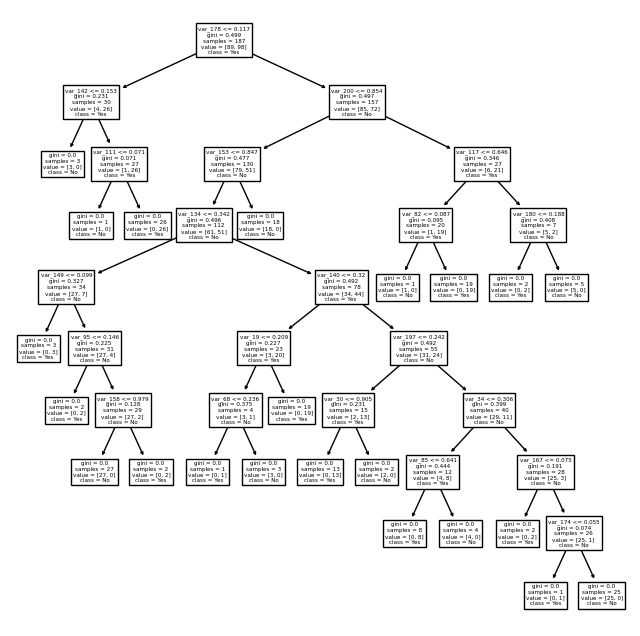

In [340]:
from sklearn import tree

fig1 = tree.plot_tree(
    dtc,
    feature_names= X.columns,
    class_names={1: "Yes", 0:"No"})

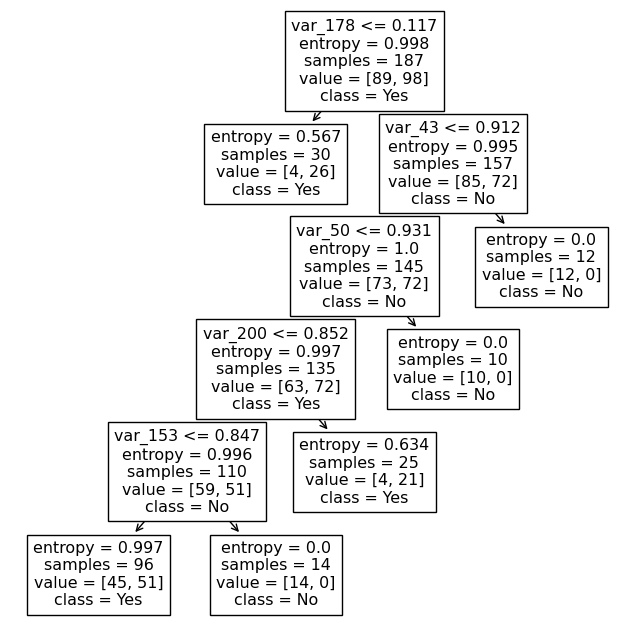

In [341]:
fig2 = tree.plot_tree(
    dtc2,
    feature_names= X.columns,
    class_names={1: "Yes", 0:"No"})

best = dtc2



### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [342]:
print(best.score(X_test, y_test))
print(best)

0.5873015873015873
DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_depth=5,
                       min_samples_leaf=10)


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [343]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))

#I was getting an error of "UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names 
#warnings.warn( from this block, I couldnt find a good way to get rid of it, so I just left it, it shouldn't mess up my code. 



0.5322817991245997
0.5313417721518987
Kyle 0.5318117856382492


c:\Users\Kyle\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul>
<li> Adjusted the ccp alpha value
<li> Changed the criterion to "entropy", "log_loss" and "gini"
<li> Adjusted min_samples_leaf values
<li> Adjusted min_depth
</ul>